# Advanced:
# Solving ODEs with numpy and scipy

Many differential equations encountered in Physics are not analytically solvable and hence numerical methods must be employed to obtain solutions. The Scipy library has many integration functions which are designed for solving ODE's.

# Using odeint:


Suppose we have the differential equation: 
$\frac{dy}{dt} = y^2 + t^2 $ where $y$ is some function of $t$.With the initial condition $y(0) = 1$.

We can solve this ode by using the following code:

    
    import scipy.integrate    import numpy as np
    
    #Takes as input y and t and returns the derivate dy/dt for those values
    def diffeq(y,t):
        x1 = y
        dydt = [x1**2+t**2]
        return dydt
    dt,tmin,tmax = 0.1,0,200
    step = int((tmax-tmin)/dt)
    t = np.linspace(tmin,tmax,step) #Start, Finish, No. of Steps
    y0 = 1
    sol = integrate.odeint(diffeq,y0,t) # diffeq : Model [returns derivs at requests y and t values], 
                                        # y0 : Initial Condition, t: Times to solve at
    

We need to define the function diffeq because we need to tell odeint what our differential equation we want to solve is. We also need to specify over what time interval we want the solution and the initial condition for our problem. To do this we pick a max and min time as well as the time step dt. Finally, sol will be a list of the same size as t which will contain the desired solution. Note that dydt in the diffeq funciton is in the format of a list, so one can use it to solve a system of ODEs by specifying x1,x2 and so on.

Example: say you wanted to solve:
$\frac{dy}{dt} = z+ zy ; \frac{dz}{dt} = sin(z)*y$

Then your diffeq function should look like:
    def diffeq(y,t):
    x1,x2 = y
    dydt =[x2+x2*x1,np.sin(x2)*x1]
    return dydt

# Exercise 1 Van der Pol Oscillator

The Van der Pol equation describes certain non-linear oscillations in an electronic circuit known as "relaxation-oscillations".
It obeys the following differential equation:
$$
\frac{d^2y}{dt^2}-\mu(1-y^2)\frac{dy}{dt}+y=0\, \text{where} \,\mu\, \text{is some constant}.
$$

1) To start off, set $\mu = 1$ and solve the Van der Pol equation. Make a plot of $y$ vs $t$ as well as $y$ vs $\frac{dy}{dt}$  (Hint: how can you transform a second order ODE into two first order ODEs ?)

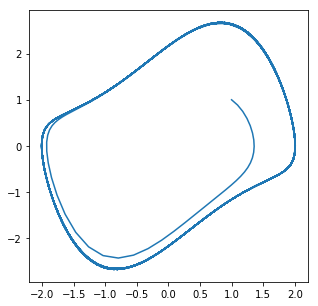

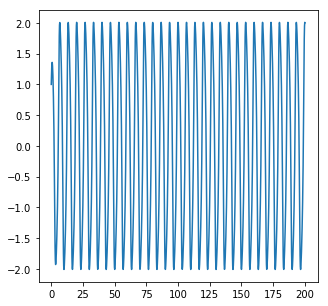

In [5]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp

# So you have y'' - (1-y^2)y'+y=0
# Then you have the first equation y'=z
# Then
# Z'-(1-y^2)z+y=0
# So these are the two equations
#z'' - (1-y^2)z + y = 0
#z = dydt


# dy / dt = z
# z'' - (1-y^2)z + y = 0
def vect(y,t):
    x1,x2 = y
    dydt = [x2,-x1+mu*(1-x1*x1)*x2]
    return dydt
mu =1
dt,tmin,tmax = 0.1,0,200
step = int((tmax-tmin)/dt)
t = np.linspace(tmin,tmax,step)

y0 = [1,1]
sol = integrate.odeint(vect,y0,t)
fig = plt.figure(figsize = (5,5))
#plt.plot(t,sol[:,0])
#plt.plot(t,sol[:,1])
plt.plot(sol[:,0],sol[:,1])
fig = plt.figure(figsize = (5,5))
plt.plot(t,sol[:,0])
plt.show()

2) Solve the equation for a range of values $ 0 < \mu < 4$ (pick an appropriate step size) and show each $y$ vs $\frac{dy}{dt}$ plot on the same figure.

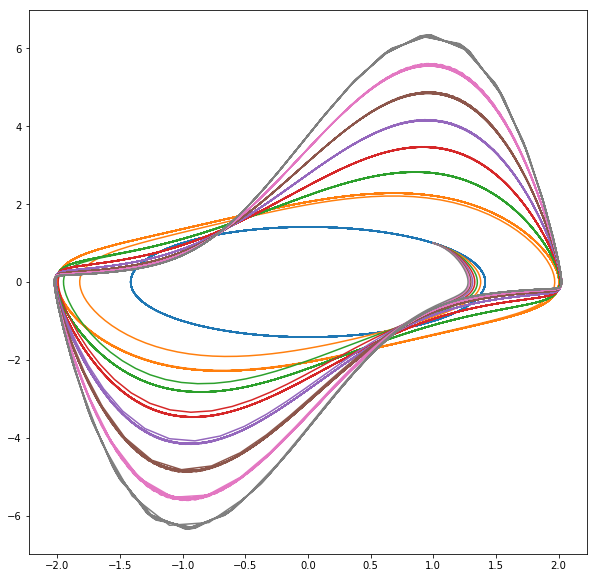

In [16]:
# dy / dt = z
# z'' - (1-y^2)z + y = 0
def vect(y,t):
    x1,x2 = y
    dydt = [x2,-x1+mu*(1-x1*x1)*x2]
    return dydt

dt,tmin,tmax = 0.05,0,100
step = int((tmax-tmin)/dt)
t = np.linspace(tmin,tmax,step)

y0 = [1,1]
dmu = 0.5
step_mu = int(4/dmu)
Mu = np.linspace(0,4,step_mu)
fig = plt.figure(figsize=(10,10))
for mu in Mu:
    sol = integrate.odeint(vect,y0,t)
    #ax = fig.add_subplot(2,2,mu)
    plt.plot(sol[:,0],sol[:,1])


# Exercise 2 Wag the Dog

In this exercise we explore a way to find the allowed energy values of a quantum mechanical operator.
Consider the quantum mechanical harmonic oscillator it satisfies the time-independent Schrodinger equation:
$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + \frac{1}{2} m \omega^2 x^2 \psi = E \psi.
$$
Introduce a variable change $\zeta = \sqrt{\frac{m \omega}{\hbar}}x$, the equation then becomes:
$$
\frac{d^2\psi}{d\zeta^2} = (\zeta^2-K)\psi \, \text{, where K is related to the energy by}\, K =\frac{2E}{\hbar \omega}.
$$
Hence if we find K we have found the energy of the system. We know that physically sensible solutions to this equation must be normalizable and hence cannot be unbounded as $\zeta$ gets large. Therefore, if we guess a value of $K$, say $K_0$ and get a function going off to $+\infty$ this cannot be the value of K. We guess again and pick another value $K_1$ until the function "flips over" and now goes off to $-\infty$ instead. Therefore $K$ is somewhere in between $K_1$ and $K_0$. This process can be repeated to get closer and closer to the actual value of K.

1)Use this method to obtain the energy of the ground state of the quantum harmonic oscillator (set $\psi(0) = 1 , \frac{d\psi}{d\zeta}(0) = 0$).

2)Find the energy of the first excited state using this method (set $\psi(0) = 0$ and $\frac{d\psi}{d\zeta}(0) = 1$).

3)Find the energy of the second excited state of the quantum harmonic oscillator (set $\psi(0) = 1 , \frac{d\psi}{d\zeta}(0) = 0$).

For all of these consider $-5 \leq \zeta \leq 5$

4) Find the ground state energy for this potential to 4 decimal places:
$$
\frac{d^2\psi}{d\zeta^2} = (-\frac{2}{(1+\zeta^2)^\frac{1}{2}}+K)\psi.
$$
Consider $-10 \leq \zeta \leq 10$ and set $\psi(0) = 1 , \frac{d\psi}{d\zeta}(0) = 0$.

Answers:
1) K = 1
2) K = 3
3) K = 5
4) K = 1.3395

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
#1.33956
K = 1.33959
#psi''=(t^2-K)psi

def vect(y,t):
    x1,x2 = y
    dydt = [x2,(-2.0*np.power(1+t**2,-0.5)+K)*x1]   # or [x2,(t*t-K)*x1] for the first 3 problems
    return dydt

dt,tmin,tmax = 0.001,-10,10
step = int((tmax-tmin)/dt)
t = np.linspace(tmin,tmax,step)
y0 = [1,0] # the reason for the different intial conditions comes from the fact that the eigenfunctions we are looking for 
#have a certain amount of nodes. The ground state is even so we pick the initial condition with initial derivative 0. 
#While for the ones that are odd we need the other initial condition.
sol = integ.odeint(vect,y0,t)
plt.plot(t,sol[:,0])

# Exercise 3 The Chua equations

The Chua circuit is the simplest possible circuit that behaves chaotically, as in it has non-periodic, deterministic behaviour that is very dependent on initial conditions. It satisfies the following ODEs:
$$
\frac{dx}{dt} = \alpha(y-x-\phi(x))
$$
$$
\frac{dy}{dt} = x-y+z 
$$
$$
\frac{dz}{dt} = -\beta y 
$$

Where:

 $\phi(x) = m_1 x +m_0-m_1$ if  $x>1$

$\quad \, \, \quad m_0x $ if  $-1 \leq\ x \leq 1 $

$\quad \, \, \quad m_1x-m_0+m_1 $ if  $x < -1 $

and $\alpha$, $\beta$, $m_0$, $m_1$ are constants.

1) Solve the Chua equations for $\alpha = 10$, $\beta = 16 $, $m_1=-\frac{5}{7}$, $m_0 = -\frac{8}{7}$ with initial condition $\vec{y_0}(0) = (-0.1,0.5,0.5)$. Plot $y$ vs $x$, $z$ vs $y$ and $z$ vs $x$.

2) Repeat part 1) but change the values of $\alpha$ to 5,8,9,12.

To explore the notion of chaos we define a distance between two trajectories.
If $\vec{y_1(t)}$ and $\vec{y_2(t)}$ are two solutions to the Chua system, then we can define a distance between them as follows:
$$
d(\vec{y_1},\vec{y_2})=\int_{t_0}^{t_f} | \vec{y_1}(t)-\vec{y_2}(t)| dt
$$

We can use the scipy.integrate function romb to calculate a definite integral from samples of a function:
    import scipy.integrate as integrate
    integrate.romb(y,dx=dt)
Where y is the list containing the values of our function and we set dt to be the same as the time step in this list.

3) Perturb the initial conditions by some small number $\epsilon$ for $\alpha = 10$ plot the function $| \vec{y_0}(t)-\vec{y_\epsilon}(t)|$ and calculate the distance between them. Repeat this exercise for $\alpha = 5,8,9$ and explain the differences that you see.
Note: romb requires that the list containing  the function being integrated has length $2^k + 1$   for some integer $k$ so you may need to change the structure of your list containing the time values.

This is the distance between the two trajectories: 0.0429483298804033


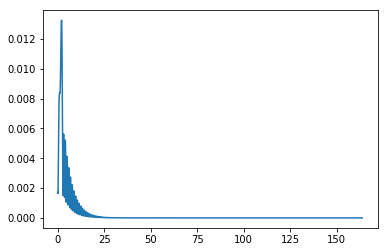

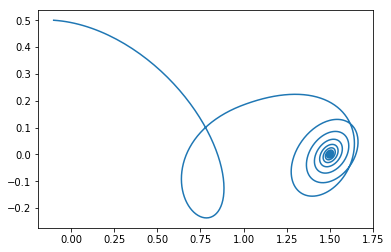

In [23]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ

alpha,m1,m0,beta = 10,-5.0/7.0,-8.0/7.0,16.0 # one can change alpha here to obtain all the different plots int the exercise.

def psi(x):      # this function is part of the chua equations
    global m1,m0
    if x  > 1:
        return m1*x +m0 - m1
    elif x >= -1 and x <= 1:
        return m0*x
    elif x < -1:
        return m1*x - m0 +m1
    
    
def vect(y,t):
    x1,x2,x3 = y
    dydt = [alpha*(x2-x1-psi(x1)),x1-x2+x3,-beta*x2]
    return dydt
    

dt = 0.01
k = 14
step_2 = 2**k+1   #note this is required for the last part with distances because of the romb function you need to redefine your
# you need to redefine your time list in terms of the amount of steps instead of tmin tmax
#However, for the first part it is fine to define the time the same way as the other problems with odes.
tmin = 0
tmax_2 = step_2*dt
t_2 = np.linspace(tmin,tmax_2,step_2)

y0 = [-0.1,0.5,0.5]
epsilon = 0.001
y0_2 = [-0.1+epsilon,0.5+epsilon,0.5+epsilon]
sol = integ.odeint(vect,y0,t_2)
sol_2 = integ.odeint(vect,y0_2,t_2)


distance_func = np.power(np.power(sol[:,0]-sol_2[:,0],2)+np.power(sol[:,1]-sol_2[:,1],2)+np.power(sol[:,2]-sol_2[:,2],2),0.5)



distance = integ.romb(distance_func,dx=dt)
plt.figure()
plt.plot(t_2,distance_func) # plotting the distance function
plt.figure()
plt.plot(sol[:,0],sol[:,1]) # plotting for the first part
print("This is the distance between the two trajectories: "+str(distance))

#one can see that the distance for the chaotic regime increases very significantly compared with the initial change in initial conditions
#For alpha = 5 the system converges to a point and hence the distance as a function of time goes to 0.
#For alpha = 9 the system is periodic and therefore the distance does not increase to a very large value
#Note that this is not a perfect example of chaotic behaviour to get a more precise measure of when our system is chaotic we have to use Lyapunov exponents.